In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
data = pd.read_csv("SPX.csv", parse_dates=["Date"])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000


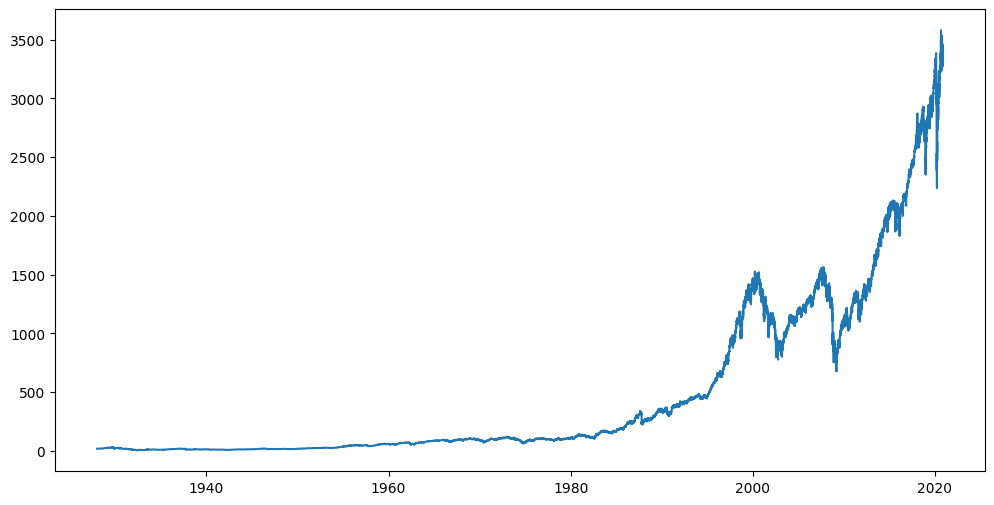

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data['Date'], data['Close'])
plt.show()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date_since_start'] = (data['Date'] - pd.Timestamp('1927-12-30')).dt.days
x = data['Date_since_start'].values.reshape(-1, 1) # ha 1 sola dimensioni quindi si fa il reshape
y = data['Close']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

In [62]:
model = LinearRegression(fit_intercept=True)

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
model.score(X_test, y_test)

0.6324881845851722

In [65]:
y1_pred = model.coef_[0] * x + model.intercept_

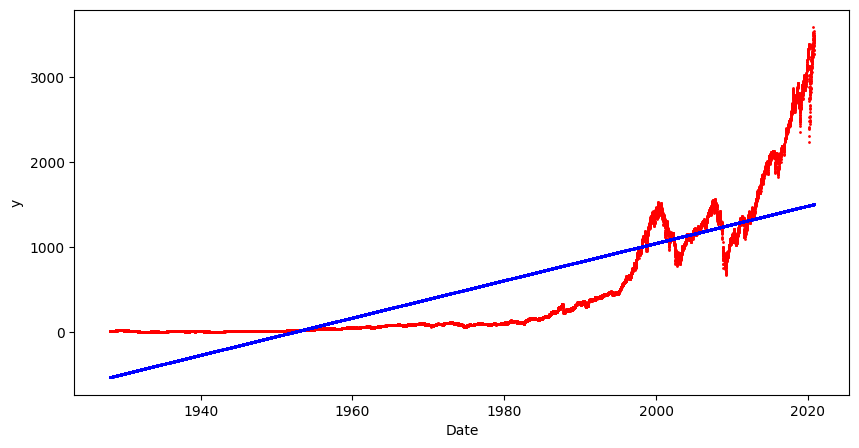

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data["Date"], y, s=1, c="r")
ax.scatter(data["Date"],y1_pred, s=1, c="b")
ax.set_xlabel("Date")
ax.set_ylabel("y")
plt.show()

In [67]:
X = data['Date_since_start'].values.reshape(-1, 1)
y_2 = np.log(data['Close'])

In [68]:
X_train, X_test, y_2_train, y_2_test = train_test_split(
    X, y_2, test_size=0.2, random_state=42)

In [69]:
model_2 = LinearRegression(fit_intercept=True)

In [70]:
model_2.fit(X_train, y_2_train)

LinearRegression()

In [71]:
model_2.score(X_test, y_2_test)

0.9569134536307105

In [72]:
y2_pred = np.exp(model_2.predict(X))

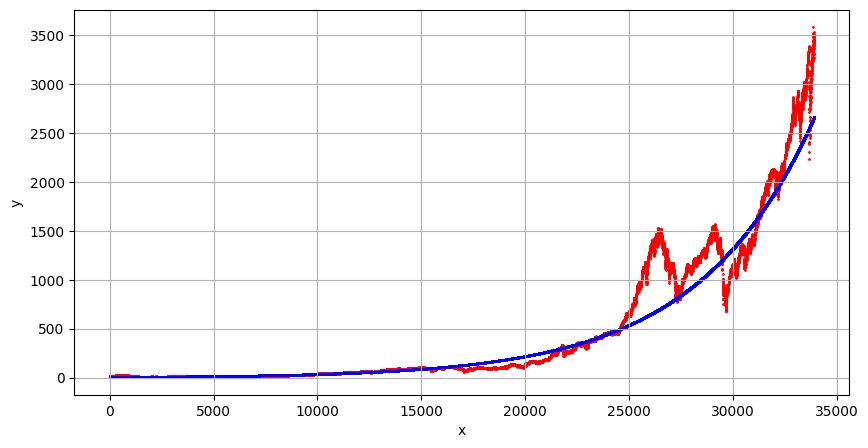

In [73]:
coef_angolare = model_2.coef_[0]
intercetta = model_2.intercept_
ascissa = np.linspace(X.min(), X.max(), 100)
ordinata = coef_angolare*ascissa + intercetta
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, s=1, c="r")
ax.scatter(X, y2_pred, s=1, c="b")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
plt.show()

Si usano i log per essere più precisi perchè riducono la fluttuazione dei prezzi che hanno cambiamenti esponenziali